<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/Desafio_T%C3%A9cnico_DHAUS_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Desafio Data Science - DHAUS - Bruno CURY

- Bibliotecas

In [1]:
pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import sidetable as stb


- DataSet do problema

In [3]:
base = pd.read_excel('/content/cancellation_prediction.xlsx')

In [4]:
base.shape # temos 28 campos

(119390, 28)

Aqui podemos ver os primeiros registros da nossa base

In [5]:
base.head()

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,3,No Deposit,NaN,NaN,0,0.0,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,4,No Deposit,NaN,NaN,0,0.0,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,NaN,NaN,0,75.0,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,304.0,NaN,0,75.0,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1


**'Cancellation'** é nosso target, já que temos um problema de Classificação

- EDA e feature Eng.

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   type                             119390 non-null  object 
 1   cancellation                     119390 non-null  int64  
 2   days_between_booking_arrival     119390 non-null  int64  
 3   year_arrival_date                119390 non-null  int64  
 4   month_arrival_date               119390 non-null  object 
 5   week_number_arrival_date         119390 non-null  int64  
 6   day_of_month_arrival_date        119390 non-null  int64  
 7   num_weekend_nights               119390 non-null  int64  
 8   num_workweek_nights              119390 non-null  int64  
 9   num_adults                       119390 non-null  int64  
 10  num_children                     119386 non-null  float64
 11  num_babies                       119390 non-null  int64  
 12  br

In [61]:
base.describe() # Estatísticas

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,2.467577,1.702019,0.031912,0.087118,0.137097,0.221124,0.469512,101.718744,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,1.420967,0.681400,0.175767,0.844336,1.497437,0.652306,0.836030,47.823771,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,7.000000,4.000000,1.000000,26.000000,72.000000,21.000000,3.000000,300.000000,8.000000,5.000000


Aqui podemos ver sobre os dados faltantes da nossa base

In [8]:
base.isnull().sum()

type                                    0
cancellation                            0
days_between_booking_arrival            0
year_arrival_date                       0
month_arrival_date                      0
week_number_arrival_date                0
day_of_month_arrival_date               0
num_weekend_nights                      0
num_workweek_nights                     0
num_adults                              0
num_children                            4
num_babies                              0
breakfast                               0
country                               488
market_segment                          0
distribution_channel                    0
repeated_guest                          0
num_previous_cancellations              0
num_previous_stays                      0
reserved_room                           0
changes_between_booking_arrival         0
deposit_policy                          0
id_travel_agency_booking            16340
id_person_booking                 

aqui temos um complemento em porcentagem dos valores faltantes

In [9]:
base.stb.missing()

,missing,total,percent
id_person_booking,112593,119390,94.306893
id_travel_agency_booking,16340,119390,13.686238
country,488,119390,0.408744
num_children,4,119390,0.003350
type,0,119390,0.000000
distribution_channel,0,119390,0.000000
required_car_parking_spaces,0,119390,0.000000
avg_price,0,119390,0.000000
customer_type,0,119390,0.000000
deposit_policy,0,119390,0.000000


aqui temos 4 campos com valores faltantes, os campos

'id_travel_agency_booking ' e 'id_person_booking' podemos apagar pois não faz sentido, já que estão quase todos nulos e são apenas IDs. Já o campo 'country' falta menos, porém não faz sentido substituir por zero, ou média, então tive a ideia de apagar ele também,   ja o 'num children' apenas falta 4, então podemos preencher com a média. 

A seguir, temos a visão geral de todos os campos

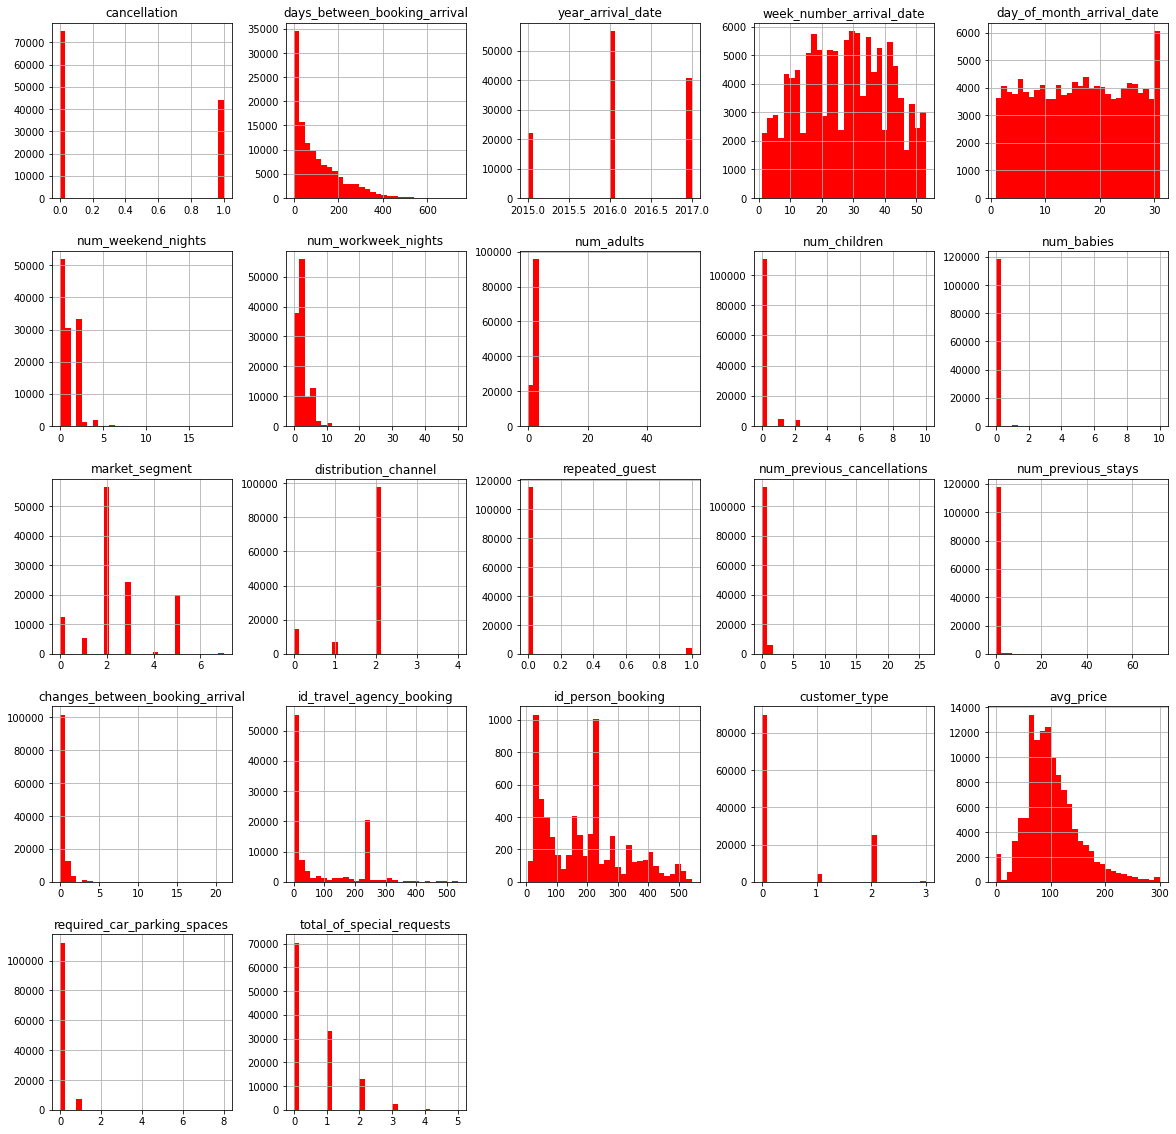

In [10]:
base.hist(bins=30, figsize=(20,20), color = 'r');

- Apagando os campos necessários

In [11]:
base.drop(['id_person_booking','id_travel_agency_booking'], axis=1, inplace = True)

In [12]:
base.drop(['country'], axis=1, inplace = True)

In [13]:
base.isnull().sum()

type                               0
cancellation                       0
days_between_booking_arrival       0
year_arrival_date                  0
month_arrival_date                 0
week_number_arrival_date           0
day_of_month_arrival_date          0
num_weekend_nights                 0
num_workweek_nights                0
num_adults                         0
num_children                       4
num_babies                         0
breakfast                          0
market_segment                     0
distribution_channel               0
repeated_guest                     0
num_previous_cancellations         0
num_previous_stays                 0
reserved_room                      0
changes_between_booking_arrival    0
deposit_policy                     0
customer_type                      0
avg_price                          0
required_car_parking_spaces        0
total_of_special_requests          0
dtype: int64

In [14]:
#Substituindo o campo 'num_children' ppela média

In [15]:
base['num_children'].fillna(base['num_children'].mean(), inplace = True)

In [16]:
#VISUALIZAO DE DADOS
np.unique(base['cancellation'], return_counts = True)

(array([0, 1]), array([75166, 44224]))

Temos então 75166 cancelamentos e 44224 não cancelamentos

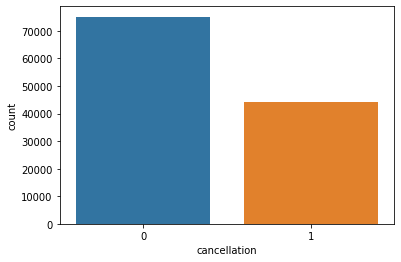

In [17]:
sns.countplot( x= base['cancellation']);

Agora podemos visualizar nosso target em relação as outras features

- Histogramas

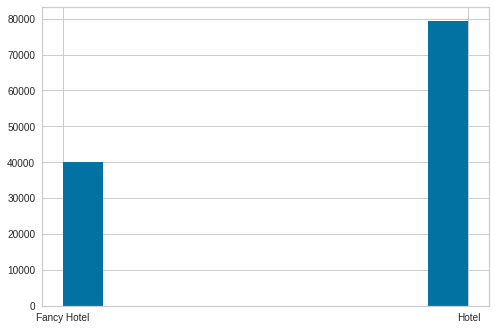

In [62]:
plt.hist( x= base['type']);

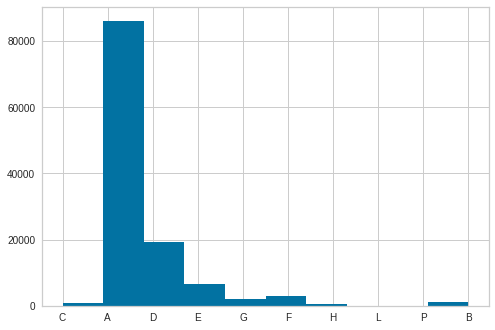

In [63]:
plt.hist(base['reserved_room']);

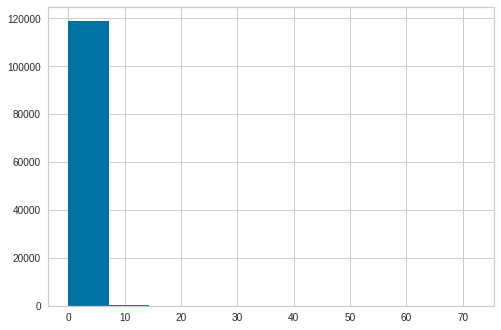

In [64]:
plt.hist( x= base['num_previous_stays']);

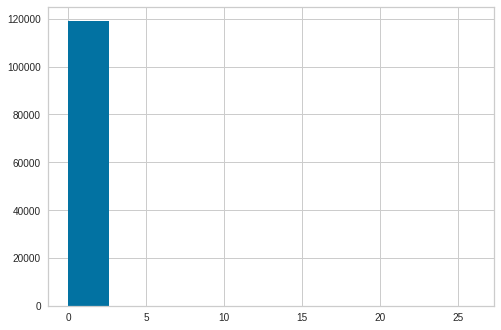

In [65]:
plt.hist( x = base['num_previous_cancellations']);

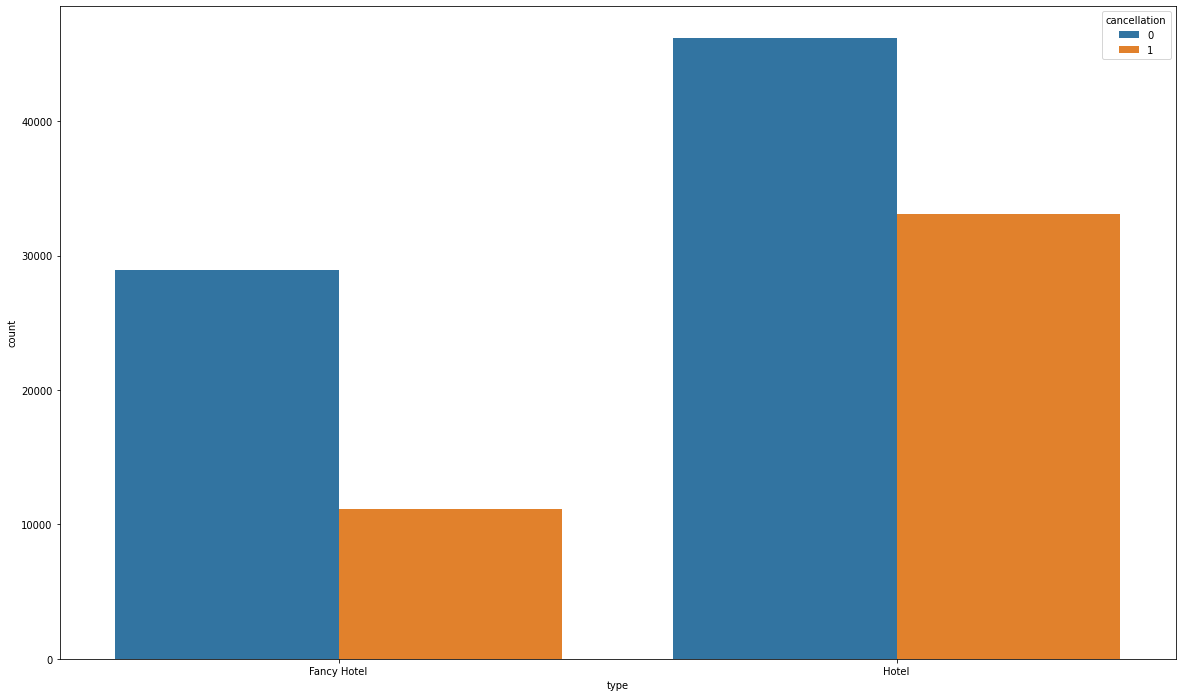

In [18]:
plt.figure(figsize = (20,12))
sns.countplot( x = 'type', hue = 'cancellation', data=base); #hue agrupamento

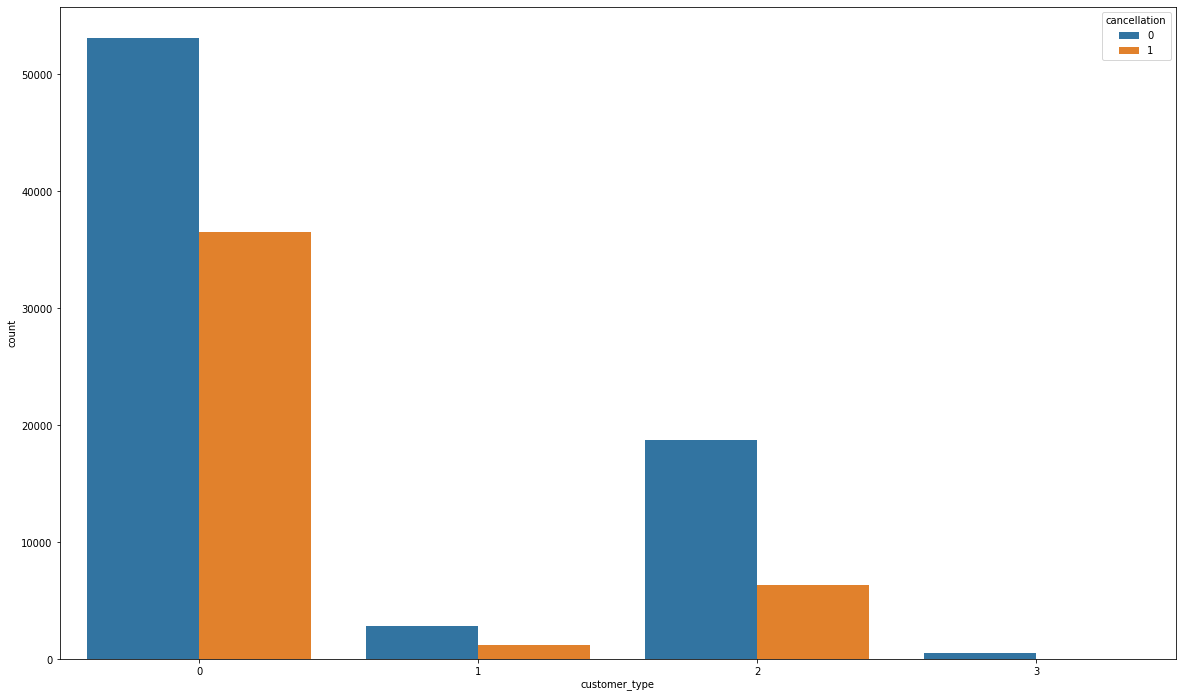

In [19]:
plt.figure(figsize = (20,12))
sns.countplot( x = 'customer_type', hue = 'cancellation', data=base); #hue agrupamento

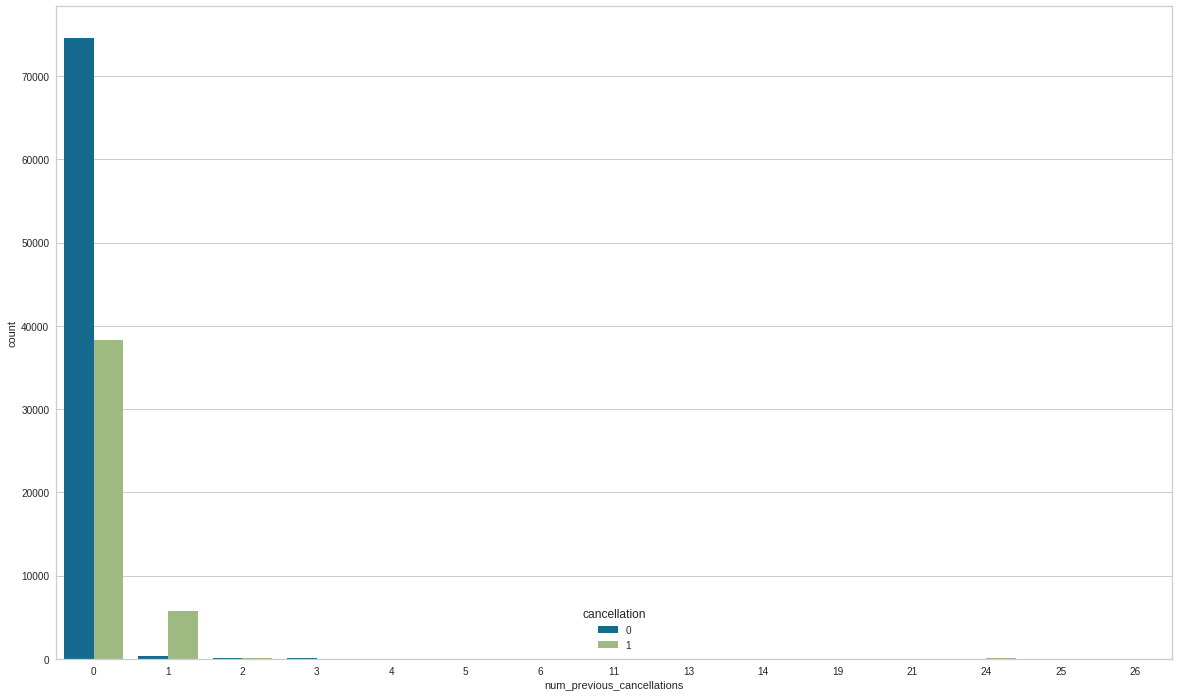

In [67]:
plt.figure(figsize = (20,12))
sns.countplot( x = 'num_previous_cancellations', hue = 'cancellation', data=base);

Precisamos transformar atributos categóricos em numéricos antes de iniciar nosso modelo

In [20]:
base # com as 3 colunas apagadas e uma coluna já modificada com a média

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,repeated_guest,num_previous_cancellations,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,C,3,No Deposit,0,0.00,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,C,4,No Deposit,0,0.00,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,A,0,No Deposit,0,75.00,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,0,A,0,No Deposit,0,75.00,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,0,A,0,No Deposit,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,0,A,0,No Deposit,0,96.14,0,0
119386,Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,0,E,0,No Deposit,0,225.43,0,2
119387,Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,0,D,0,No Deposit,0,157.71,0,4
119388,Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,0,A,0,No Deposit,0,104.40,0,0


 As colunas '0, 4, 12,18 e 20' são categoricas

In [21]:
base.shape #nova base com as colunas apagadas

(119390, 25)

- Separando Dados de Treino e Teste

In [22]:
x_categorico = base[['type','month_arrival_date','breakfast','reserved_room','deposit_policy']]
x_categorico

,type,month_arrival_date,breakfast,reserved_room,deposit_policy
0,Fancy Hotel,July,True,C,No Deposit
1,Fancy Hotel,July,True,C,No Deposit
2,Fancy Hotel,July,True,A,No Deposit
3,Fancy Hotel,July,True,A,No Deposit
4,Fancy Hotel,July,True,A,No Deposit
...,...,...,...,...,...
119385,Hotel,August,True,A,No Deposit
119386,Hotel,August,True,E,No Deposit
119387,Hotel,August,True,D,No Deposit
119388,Hotel,August,True,A,No Deposit


In [23]:
x_numerico =  base[['cancellation','days_between_booking_arrival','year_arrival_date','week_number_arrival_date','day_of_month_arrival_date','num_weekend_nights','num_workweek_nights','num_adults','num_children','num_babies','market_segment','distribution_channel','repeated_guest','num_previous_cancellations','num_previous_stays','changes_between_booking_arrival','customer_type','avg_price','required_car_parking_spaces','total_of_special_requests']]
x_numerico

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,2,2,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,3,2,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,2,2,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,2,2,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,2,2,0,0,0,0,0,104.40,0,0


- OnehotEncoder para a as variaveis Categ

In [25]:
#para os modelo entender que nenhuma variavel tem mais importancia que a outra, temos que importar:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_categorico = onehotencoder.fit_transform(x_categorico).toarray()

Vale lembrar que poderiamos fazer essa transformação pelo Label Encoder, mas achei melhor usar direto o Hot Encoding pois ela já faz um trabalho mais 'bem feito'

In [26]:
x_categorico = pd.DataFrame(x_categorico)
type(x_categorico)

pandas.core.frame.DataFrame

In [27]:
x_categorico

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119386,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119387,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119388,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
x_numerico

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,2,2,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,3,2,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,2,2,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,2,2,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,2,2,0,0,0,0,0,104.40,0,0


Vamos juntar as bases novamente

In [29]:
x_all = pd.concat([x_categorico, x_numerico], axis=1)
x_all

,0,1,2,3,4,5,6,7,8,9,...,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,3,0,0.00,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,4,0,0.00,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,75.00,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,0,0,0,0,0,75.00,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2,2,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,0,0,0,0,96.14,0,0
119386,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,225.43,0,2
119387,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,157.71,0,4
119388,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,104.40,0,0


- normalização na mesma escala para o algoritimo nao dar mais preferencia a nenhuma var

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x_all)
x

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[1.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.    , 0.    , ..., 0.25  , 0.    , 0.    ],
       ...,
       [0.    , 1.    , 0.    , ..., 0.5257, 0.    , 0.8   ],
       [0.    , 1.    , 0.    , ..., 0.348 , 0.    , 0.    ],
       [0.    , 1.    , 0.    , ..., 0.504 , 0.    , 0.4   ]])

In [32]:
y = base['cancellation']
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: cancellation, Length: 119390, dtype: int64

- Treinando o Modelo

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

In [35]:
x_treino.shape

(89542, 49)

In [36]:
y_treino.shape

(89542,)

In [37]:
x_teste.shape

(29848, 49)

In [38]:
y_teste.shape

(29848,)

- Algoritimo de Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [41]:
rf.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [42]:
previsao = rf.predict(x_teste)
previsao

array([0, 0, 1, ..., 0, 1, 1])

In [43]:
y # real

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: cancellation, Length: 119390, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_teste,previsao)

1.0

In [47]:
from yellowbrick.classifier import ConfusionMatrix

1.0

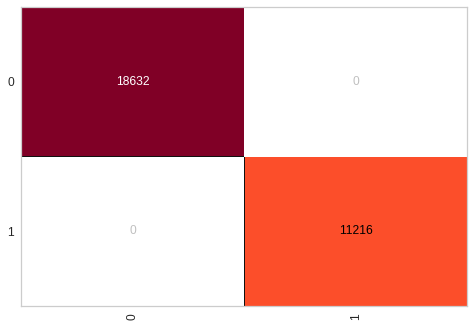

In [49]:
cm = ConfusionMatrix(rf)
cm.fit(x_treino, y_treino)
cm.score(x_teste,y_teste)

Temos aqui um modelo 'perfeito', onde acertou tudo, como podemos visualizar n matriz de confusão, sem falsos positivos e negativos

In [50]:
from sklearn.metrics import classification_report

Vamos ver aqui as métricas mais importantes: **precision    recall  f1-score   support**

In [52]:
print(classification_report(y_teste,previsao))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18632
           1       1.00      1.00      1.00     11216

    accuracy                           1.00     29848
   macro avg       1.00      1.00      1.00     29848
weighted avg       1.00      1.00      1.00     29848





Macro AVG é media do reultado do F1-Score (somando e divindo as duas classes)

aqui vimos em detalhes o resultado do algoritimo

Poderiamos testar outros algoritimos, mas neste caso, já obtivemos a melhor acurácia possível

Porém vamos fazer a validação cruzada

In [53]:
from sklearn.model_selection import cross_val_score

In [55]:
acuracias = cross_val_score(rf, x, y, cv=5)
acuracias

array([1.        , 1.        , 1.        , 1.        , 0.99995812])

In [56]:
print("acuracia final:", np.mean(acuracias), "+-", np.std(acuracias))

acuracia final: 0.9999916240891198 +- 1.6751821760596642e-05


In [57]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(rf, x, y, cv=5)
print(pred)

[0 0 0 ... 0 0 0]


In [58]:
pred_prob = cross_val_predict(rf, x, y, cv=5, method="predict_proba")
print(pred_prob[0])

[0.82 0.18]


- Poderiamos usar KFold e/ ou  StratifiedKFold

In [60]:
from sklearn.model_selection import KFold
n_folders = 5
cross_val = KFold(n_splits=n_folders, shuffle=True, random_state=0)
cross_val

KFold(n_splits=5, random_state=0, shuffle=True)

Poderiamos fazer a validação em diferentes anos em relação ao ano que foi usado nos testes, assim teriamos outros parametros para analisar o modelo, porém usar o mesmo ano em testes e na validação, tamabém nos diz muita coisa, e mantemos o padrão, mas é claro, que o ideal é sempre ir fazendo testes, para uma melhor assertividade do modelos que contruimos, além de sempre testar novas métricas e modelos. Neste caso de classificação, poderiamos ter usado vários algoritimos diferentes, como **Decision Tree, Naive Bayes, Regressão Logistica, e até Redes Neurais.**